In [ ]:
from pyparsing import pprint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from numpy.lib.function_base import average

import matplotlib.pyplot as plt
import seaborn as sns 

import keras
from keras.callbacks import History
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [ ]:
class NeuralNet:
    def __init__(self, dataFile, header=True):
        self.raw_input = pd.read_csv(dataFile)
        self.processed_data = self.raw_input
        # Below are the hyperparameters that you need to use for model evaluation
        self.activations = ['sigmoid', 'tanh', 'relu']
        self.learning_rate = [0.01, 0.1]
        # also known as epochs
        self.max_iterations = [100,200]
        self.num_hidden_layers = [2, 3]  
        
    
    #Code to print the metadata of the raw data 
    def printDataInfo(self):  
      #Print the data info 
      self.processed_data.info()
      print(self.processed_data.describe(),end="\n\n")
      #Print the sum of Null values if any 
      print(self.processed_data.isna().sum(),end="\n\n")
      #Print no of duplicate rows 
      print("Duplicate Data : " ,end=" ")
      print(self.processed_data.duplicated().sum())

   # Code for pre-processing the dataset, which would include standardization, normalization, categorical to numerical, etc
    def preprocess(self):
        self.processed_data = self.raw_input       
        # Remove duplicate rows
        self.processed_data.drop_duplicates(inplace=True)
        # Normalization of the data
        s = StandardScaler()
        self.processed_data = pd.DataFrame(s.fit(self.processed_data).fit_transform(self.processed_data))

    # Plot the model history for each model in a single plot
    # model history is a plot of accuracy vs number of epochs
    # you may want to create a large sized plot to show multiple lines
    # in a same figure.

    def PlotHistoryPerModel(self,result_per_epoch,l,j,flag):
      if flag:
        i = 0
        while i <= len(result_per_epoch)-3:
          accuracy_train_sigmoid =  result_per_epoch[i].history['accuracy']
          accuracy_train_tanh =  result_per_epoch[i+1].history['accuracy']
          accuracy_train_reLu =  result_per_epoch[i+2].history['accuracy']

          accuracy_test_sigmoid =  result_per_epoch[i].history['val_accuracy']
          accuracy_test_tanh =  result_per_epoch[i+1].history['val_accuracy']
          accuracy_test_reLu =  result_per_epoch[i+2].history['val_accuracy']

          loss_train_sigmoid =  result_per_epoch[i].history['loss']
          loss_train_tanh =  result_per_epoch[i+1].history['loss']
          loss_train_reLu =  result_per_epoch[i+2].history['loss']

          loss_test_sigmoid =  result_per_epoch[i].history['val_loss']
          loss_test_tanh =  result_per_epoch[i+1].history['val_loss']
          loss_test_reLu =  result_per_epoch[i+2].history['val_loss']

          i = i+3
     
        labels1= ["sigmoid_accuracy","tanh_accuracy","reLu_accuracy"]
        labels2= ["sigmoid_loss","tanh_loss","reLu_loss"]
        
        #plot Train Accuracy for learning rate j and epoch l 
        fig = plt.figure(figsize=(14,10))
        plt.plot(range(1,len(accuracy_train_sigmoid)+1),accuracy_train_sigmoid, color='green', linestyle='solid')
        plt.plot(range(1,len(accuracy_train_tanh)+1),accuracy_train_tanh, color='red', linestyle='solid')
        plt.plot(range(1,len(accuracy_train_reLu)+1),accuracy_train_reLu, color='blue', linestyle='solid') 
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title('Train Accuracy Vs Epoch '+ str(l) + ' Learning Rate ' + str(j))
        plt.legend(labels1, fontsize=8, loc = 'upper left')
        plt.show()
        print("\n")

        # #plot Train Loss for learning rate j and epoch l 
        fig2 = plt.figure(figsize=(14,10))
        plt.plot(range(1,len(loss_train_sigmoid)+1),loss_train_sigmoid, color='green', linestyle='dashed')
        plt.plot(range(1,len(loss_train_tanh)+1),loss_train_tanh, color='red', linestyle='dashed')
        plt.plot(range(1,len(loss_train_reLu)+1),loss_train_reLu, color='blue', linestyle='dashed')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title('Train Loss Vs Epoch '+ str(l) + ' Learning Rate ' + str(j))
        plt.legend(labels2, fontsize=8, loc = 'upper left')
        plt.show()
        print("\n")

        #plot Test Accuracy for learning rate j and epoch l 
        fig3 = plt.figure(figsize=(14,10))
        plt.plot(range(1,len(accuracy_test_sigmoid)+1),accuracy_train_sigmoid, color='green', linestyle='solid')
        plt.plot(range(1,len(accuracy_test_tanh)+1),accuracy_train_tanh, color='red', linestyle='solid')
        plt.plot(range(1,len(accuracy_test_reLu)+1),accuracy_train_reLu, color='blue', linestyle='solid')
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy,Loss")
        plt.title('Test Data Accuracy  Vs Epoch '+ str(l) +' Learning Rate '+ str(j))
        plt.legend(labels1, fontsize=8, loc = 'upper left')
        plt.show()
        print("\n")
        

        #plot Train loss for learning rate j and epoch l 
        fig3 = plt.figure(figsize=(14,10))
        plt.plot(range(1,len(loss_test_sigmoid)+1),loss_train_sigmoid, color='green', linestyle='dashed')
        plt.plot(range(1,len(loss_test_tanh)+1),loss_train_tanh, color='red', linestyle='dashed')
        plt.plot(range(1,len(loss_test_reLu)+1),loss_train_reLu, color='blue', linestyle='dashed')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title('Test Data Loss  Vs Epoch '+ str(l) +' Learning Rate '+ str(j))
        plt.legend(labels2, fontsize=8, loc = 'upper left')
        plt.show()
        print("\n")
      else:
        #Plot accuracy and loss of all models in single graph 
        print(len(result_per_epoch))
        print("\n")
        accuracy_train=[]
        accuracy_test=[]
        for i in range(0,len(result_per_epoch)):
          accuracy_train.append( result_per_epoch[i].history['accuracy'])
          accuracy_test.append(result_per_epoch[i].history['val_accuracy'])

        #Plotting Accuracy vs l Epochs
        lable = []
        for j in self.learning_rate:
          for k in self.num_hidden_layers:
            for i in self.activations:
              lable.append(i+', '+str(j)+', '+str(k))

        fig1 = plt.figure(figsize=(14,10))
        for y in accuracy_train:
          x=range(1, len(y)+1)
          plt.plot(x,y)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title('Train data Accuracy Vs Epochs' + str(l))
        plt.legend(lable, fontsize=8, loc = 'upper left')
        plt.show()
        print("\n")        
     
        fig2 = plt.figure(figsize=(14,10))
        for y in accuracy_test:
          x=range(1, len(y)+1)
          plt.plot(x,y)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title('Test data Accuracy Vs Epochs' + str(l))
        plt.legend(lable, fontsize=8, loc = 'upper left')
        plt.show()
        print("\n")

    # Train and evaluate models for all combinations of parameters
    # specified. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #       the models in a single plot. The plot should be color coded i.e.
    #       different color for each model
    def train_evaluate(self):
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)
        X = self.processed_data.iloc[:, 0:(ncols - 1)]
        Y = self.processed_data.iloc[:, (ncols-1)]
        Y=to_categorical(Y,num_classes=10)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, shuffle = True, random_state =1)
        print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
        result_history = []
       
        # Create the neural network and be sure to keep track of the performance metrics
        for l in self.max_iterations:
          result_per_model= []
          for j in self.learning_rate:
            result_per_epoch= []
            for k in self.num_hidden_layers:
              for i in self.activations :    
                neural_net=Sequential()
                neural_net.add(Dense(units=15,kernel_initializer= 'normal',input_shape=(11,), activation=i))
                neural_net.add(Dense(10, activation=i))
                if k==3:
                  neural_net.add(Dense(10,kernel_initializer= 'normal',activation=i))
                neural_net.add(Dense(10, kernel_initializer= 'normal',activation=i))
                neural_net.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(j),metrics=['accuracy'])
                result = neural_net.fit(X_train, Y_train, epochs=l, validation_data= (X_test,Y_test), batch_size=10, verbose=0)
                result_history.append(result)
                result_per_epoch.append(result)
                result_per_model.append(result)

                #print(neural_net.summary())
                
                prediction_train = neural_net.predict(X_train)
                prediction_test = neural_net.predict(X_test)
                train_scores= neural_net.evaluate(X_train, Y_train, verbose=0)

                print("Activation Function : " , i,end=" ")    
                print("Learning rate : ",j , end=" ")
                print("Hidden Layer: ",k,end=" ")
                print("Epoch : " , l)
                print('Accuracy of Training data  : {} \nTraining Error : {}'.format(round(train_scores[1],4), round(train_scores[0],4)))   
                test_scores = neural_net.evaluate(X_test, Y_test, verbose=0)
                print('Accuracy of Test data : {} \nTesting Error : {}'.format(round(test_scores[1],4), round(test_scores[0],4))) 
                print("---------------------------------------------------------------------------------------------------\n")
            #print the graph each of learning rate 
            neuralNtwkObj.PlotHistoryPerModel(result_per_epoch,l,j,1)
            print("****************************************************************************************************\n")
            #plot results of all models in single graph 
          neuralNtwkObj.PlotHistoryPerModel(result_per_model,l,j,0)
        return result_history

In [ ]:
#load the data frame and print the metadata 
neuralNtwkObj = NeuralNet('https://raw.githubusercontent.com/learner-pratik/ML_Assignment_Datasets/main/winequality-red.csv')
neuralNtwkObj.printDataInfo()
#From the input we can infer that there are no categorical or NULL data. But there are 240 duplicate data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000    

In [ ]:
#preprocess the data 
neuralNtwkObj.preprocess()
neuralNtwkObj.printDataInfo()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1359 non-null   float64
 1   1       1359 non-null   float64
 2   2       1359 non-null   float64
 3   3       1359 non-null   float64
 4   4       1359 non-null   float64
 5   5       1359 non-null   float64
 6   6       1359 non-null   float64
 7   7       1359 non-null   float64
 8   8       1359 non-null   float64
 9   9       1359 non-null   float64
 10  10      1359 non-null   float64
 11  11      1359 non-null   float64
dtypes: float64(12)
memory usage: 127.5 KB
                 0             1             2             3             4   \
count  1.359000e+03  1.359000e+03  1.359000e+03  1.359000e+03  1.359000e+03   
mean  -6.274108e-16  1.463959e-16  2.091369e-17 -1.202537e-16  1.882232e-16   
std    1.000368e+00  1.000368e+00  1.000368e+00  1.000368e+00  1.000368e+00   
min   -2.137008e

(1087, 11) (272, 11) (1087, 10) (272, 10)
Activation Function :  sigmoid Learning rate :  0.01 Hidden Layer:  2 Epoch :  100
Accuracy of Training data  : 0.8776 
Training Error : 0.2951
Accuracy of Test data : 0.8125 
Testing Error : 0.7933
---------------------------------------------------------------------------------------------------

Activation Function :  tanh Learning rate :  0.01 Hidden Layer:  2 Epoch :  100
Accuracy of Training data  : 0.1233 
Training Error : 12.0107
Accuracy of Test data : 0.114 
Testing Error : 12.3849
---------------------------------------------------------------------------------------------------

Activation Function :  relu Learning rate :  0.01 Hidden Layer:  2 Epoch :  100
Accuracy of Training data  : 0.8132 
Training Error : 3.0101
Accuracy of Test data : 0.8382 
Testing Error : 2.6073
---------------------------------------------------------------------------------------------------

Activation Function :  sigmoid Learning rate :  0.01 Hidden Lay

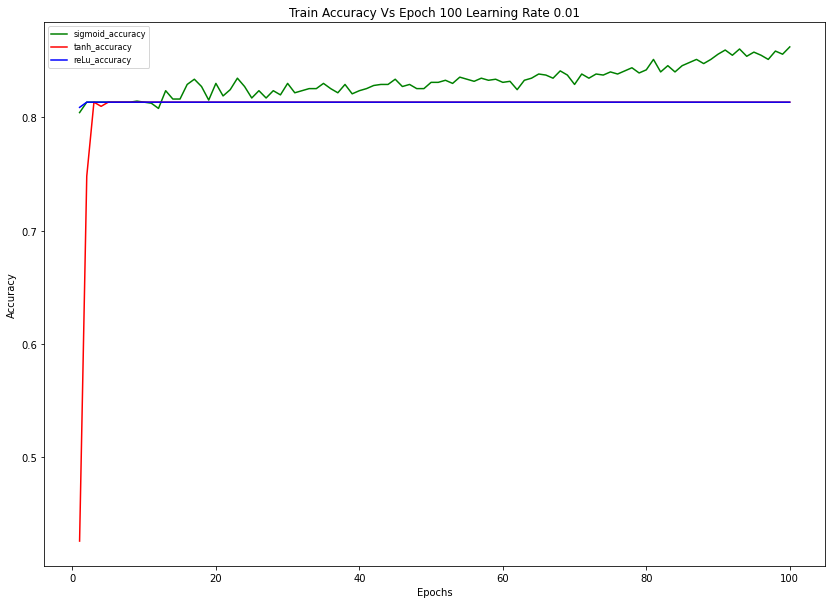

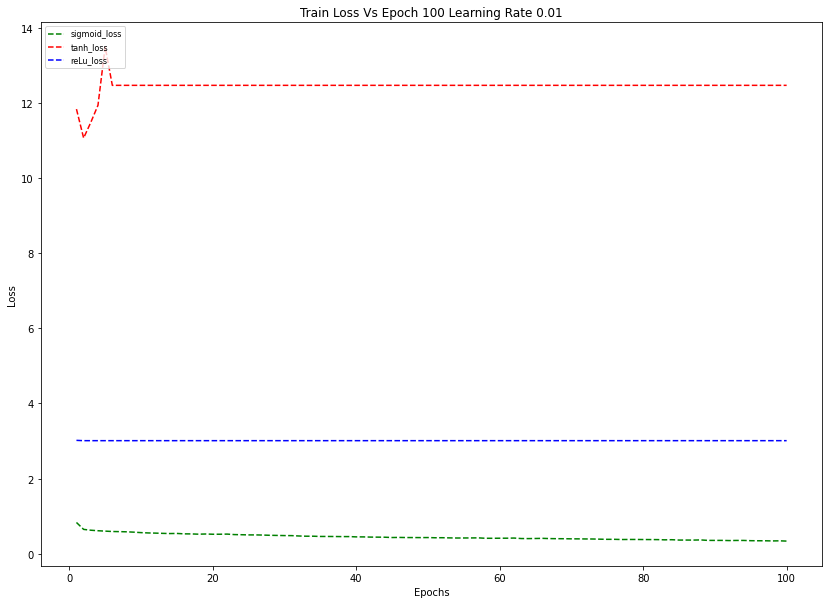

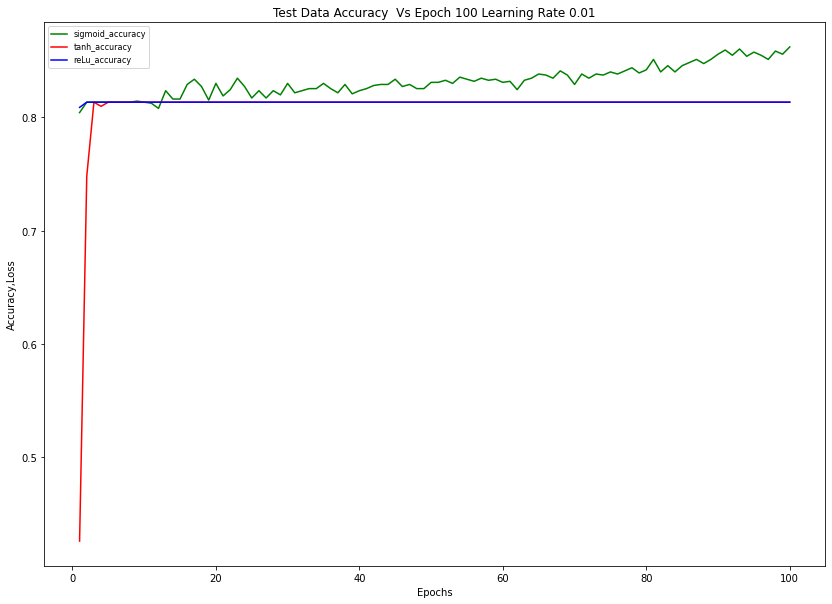

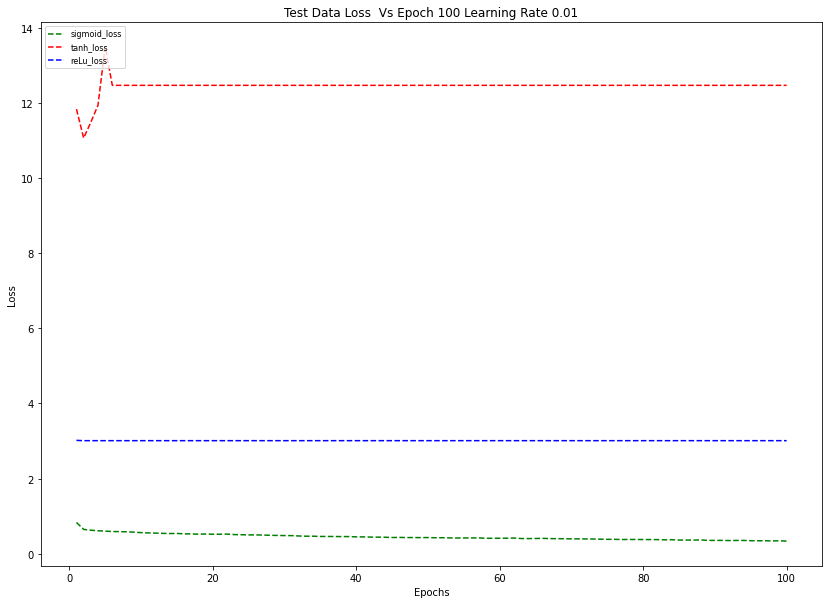



****************************************************************************************************

Activation Function :  sigmoid Learning rate :  0.1 Hidden Layer:  2 Epoch :  100
Accuracy of Training data  : 0.8611 
Training Error : 0.3457
Accuracy of Test data : 0.7868 
Testing Error : 0.904
---------------------------------------------------------------------------------------------------

Activation Function :  tanh Learning rate :  0.1 Hidden Layer:  2 Epoch :  100
Accuracy of Training data  : 0.8132 
Training Error : nan
Accuracy of Test data : 0.8382 
Testing Error : nan
---------------------------------------------------------------------------------------------------

Activation Function :  relu Learning rate :  0.1 Hidden Layer:  2 Epoch :  100
Accuracy of Training data  : 0.8132 
Training Error : 3.0101
Accuracy of Test data : 0.8382 
Testing Error : 2.6073
---------------------------------------------------------------------------------------------------

Activation F

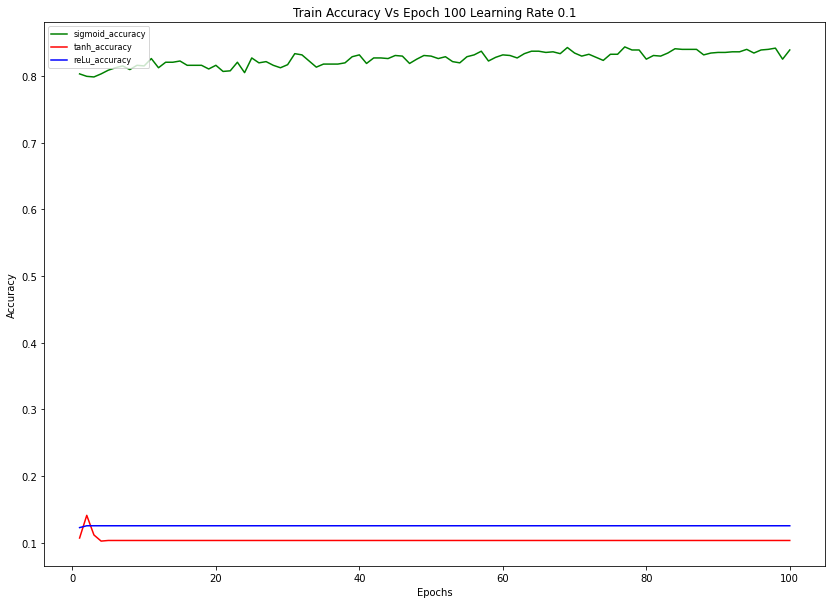

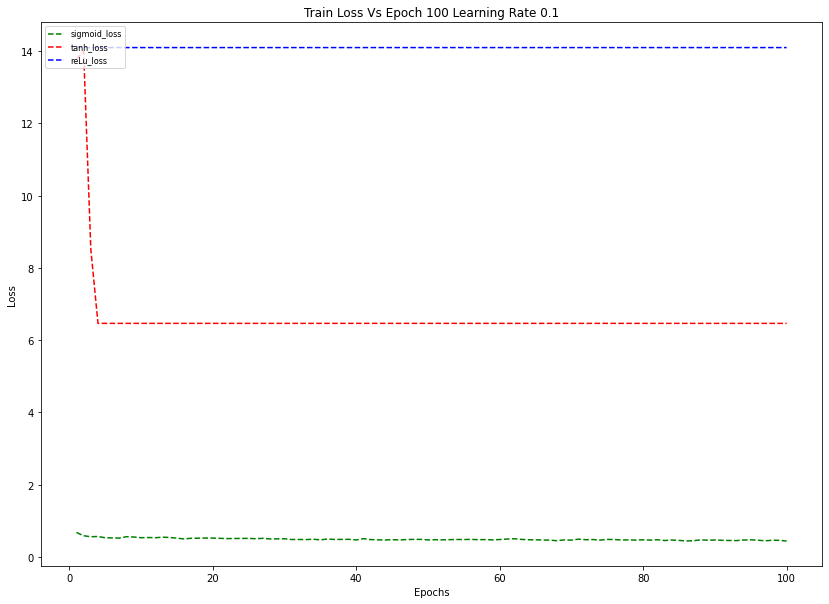

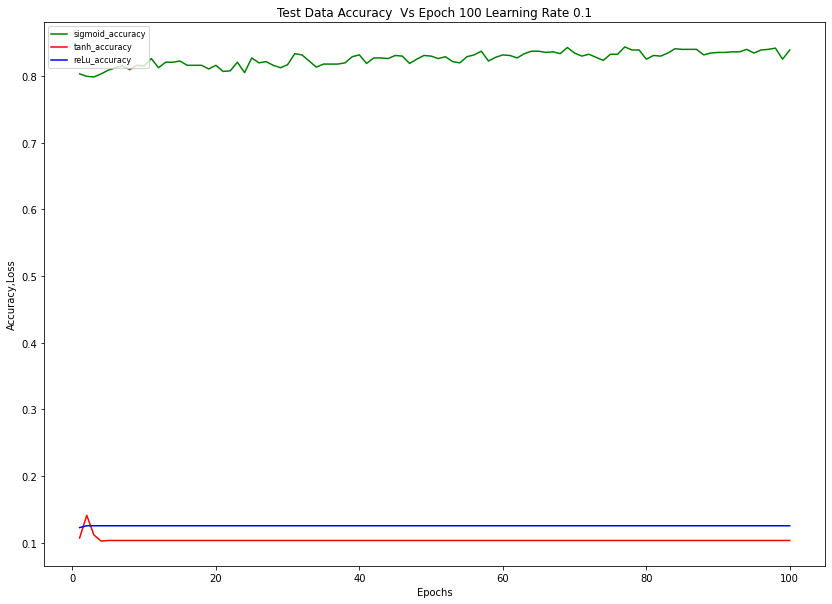

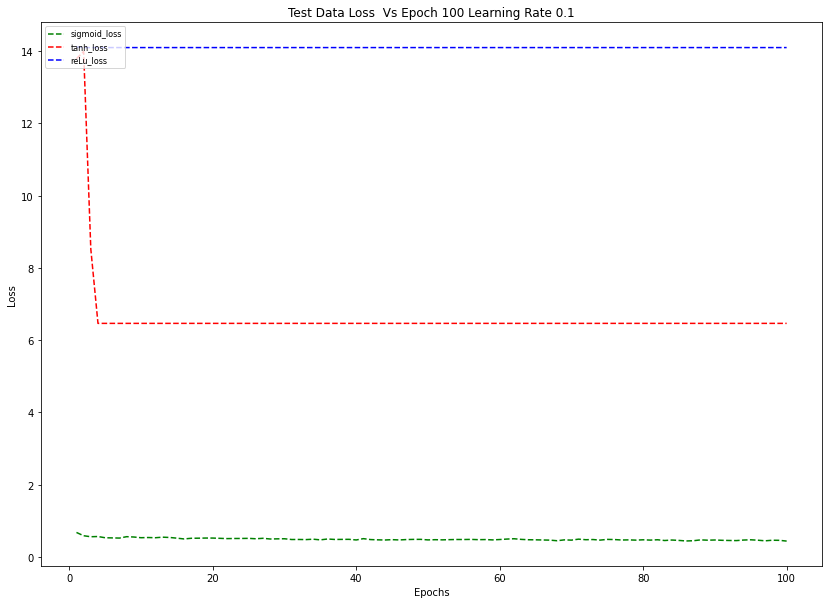



****************************************************************************************************

12




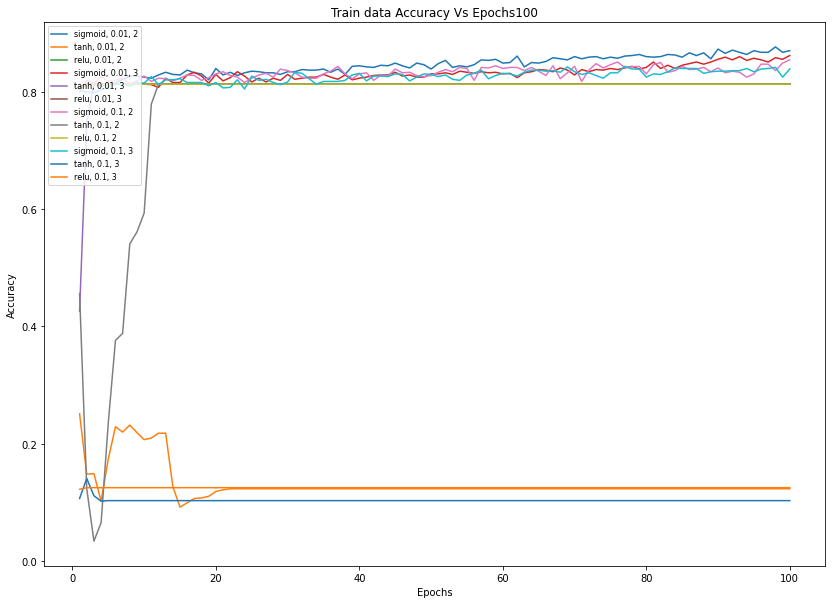

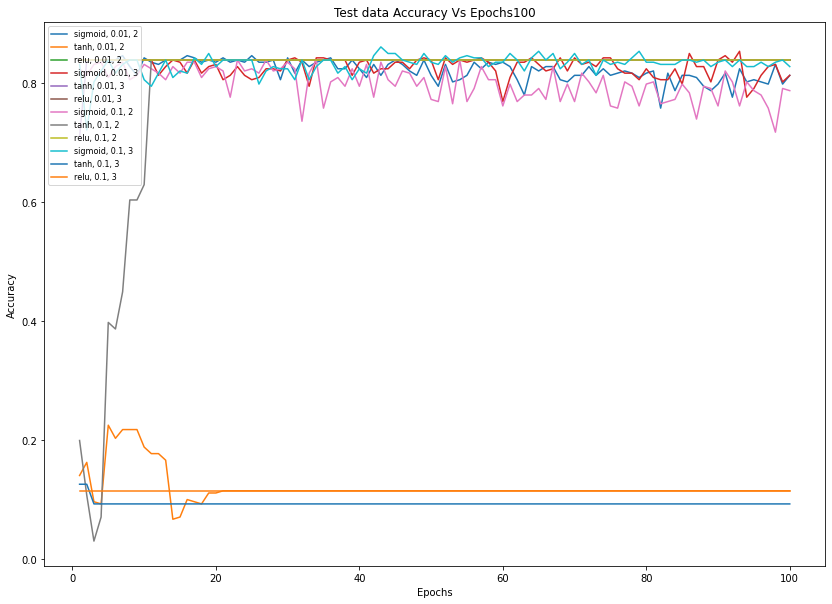



Activation Function :  sigmoid Learning rate :  0.01 Hidden Layer:  2 Epoch :  200
Accuracy of Training data  : 0.9144 
Training Error : 0.2033
Accuracy of Test data : 0.8051 
Testing Error : 0.8575
---------------------------------------------------------------------------------------------------

Activation Function :  tanh Learning rate :  0.01 Hidden Layer:  2 Epoch :  200
Accuracy of Training data  : 0.3487 
Training Error : 3.7812
Accuracy of Test data : 0.3529 
Testing Error : 3.0981
---------------------------------------------------------------------------------------------------

Activation Function :  relu Learning rate :  0.01 Hidden Layer:  2 Epoch :  200
Accuracy of Training data  : 0.8132 
Training Error : nan
Accuracy of Test data : 0.8382 
Testing Error : nan
---------------------------------------------------------------------------------------------------

Activation Function :  sigmoid Learning rate :  0.01 Hidden Layer:  3 Epoch :  200
Accuracy of Training data  

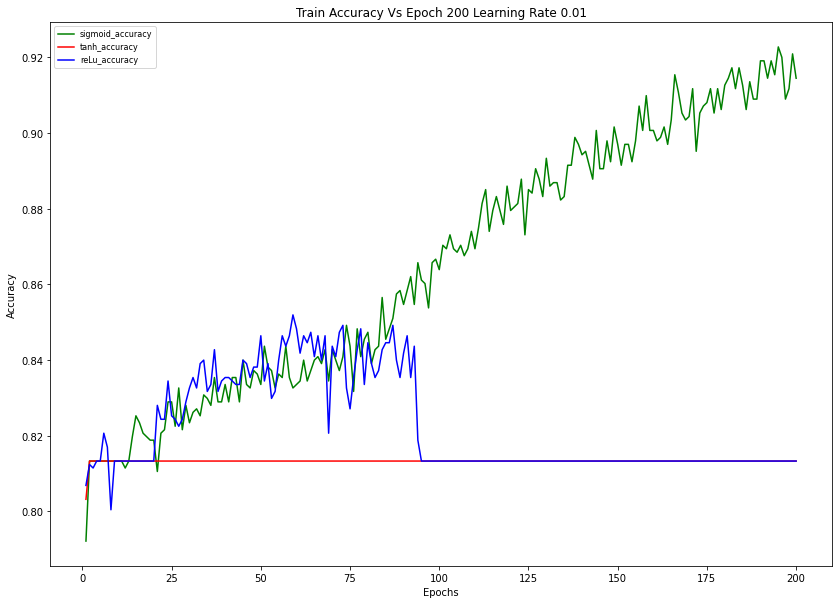

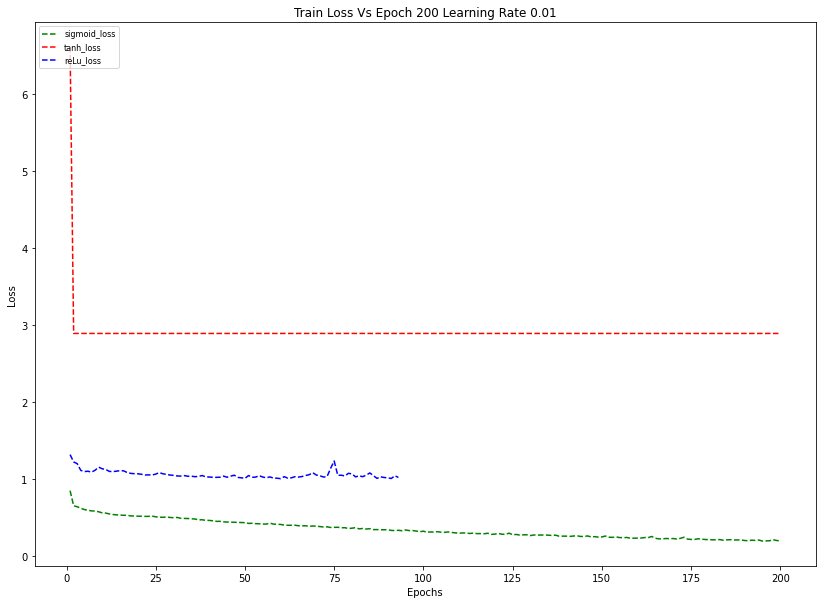

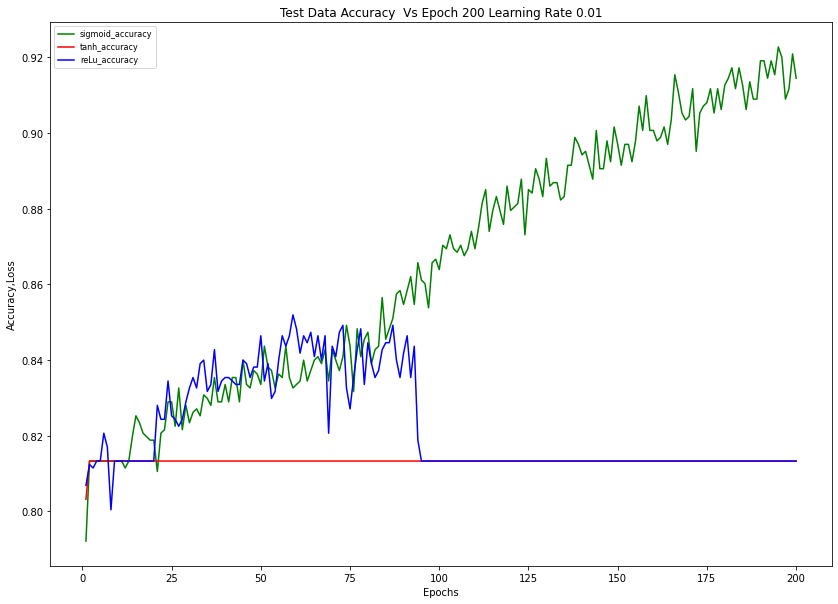

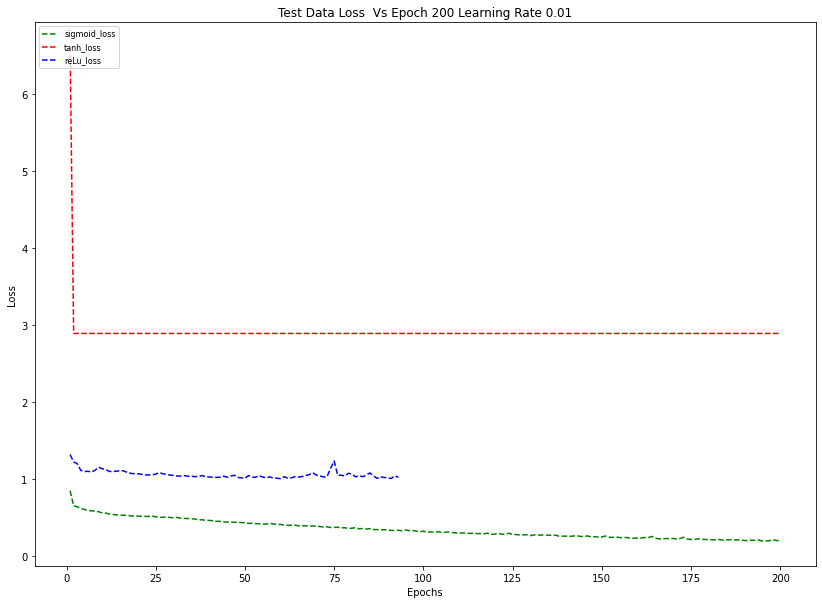



****************************************************************************************************

Activation Function :  sigmoid Learning rate :  0.1 Hidden Layer:  2 Epoch :  200
Accuracy of Training data  : 0.8408 
Training Error : 0.3827
Accuracy of Test data : 0.8015 
Testing Error : 0.9283
---------------------------------------------------------------------------------------------------

Activation Function :  tanh Learning rate :  0.1 Hidden Layer:  2 Epoch :  200
Accuracy of Training data  : 0.8132 
Training Error : nan
Accuracy of Test data : 0.8382 
Testing Error : nan
---------------------------------------------------------------------------------------------------

Activation Function :  relu Learning rate :  0.1 Hidden Layer:  2 Epoch :  200
Accuracy of Training data  : 0.8132 
Training Error : nan
Accuracy of Test data : 0.8382 
Testing Error : nan
---------------------------------------------------------------------------------------------------

Activation Functi

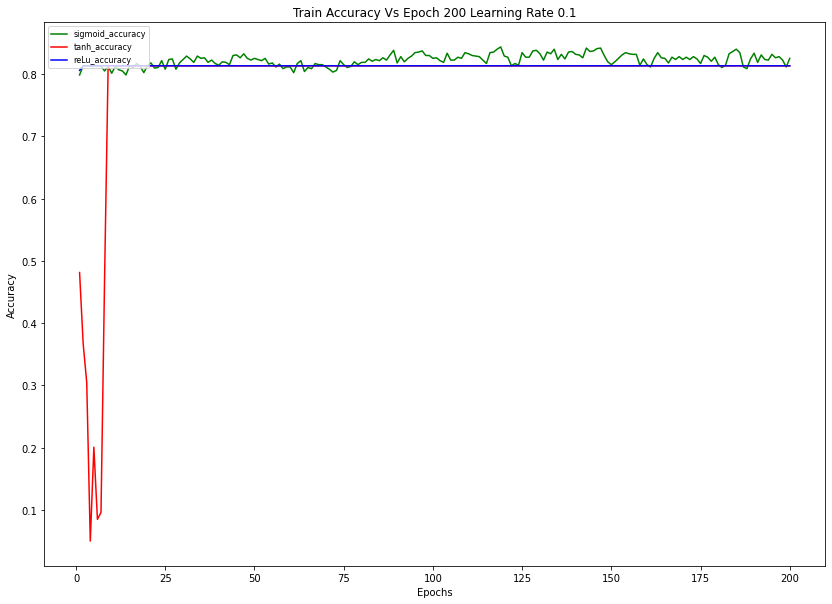

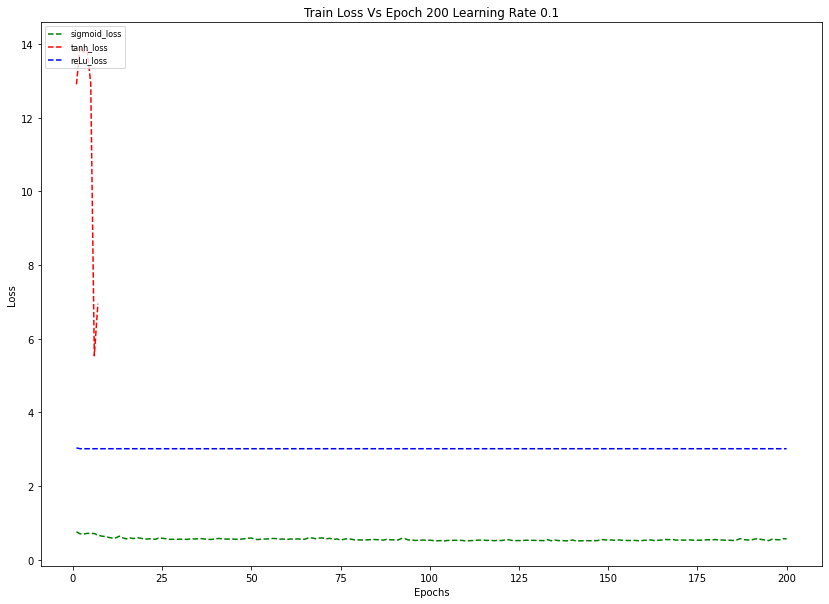

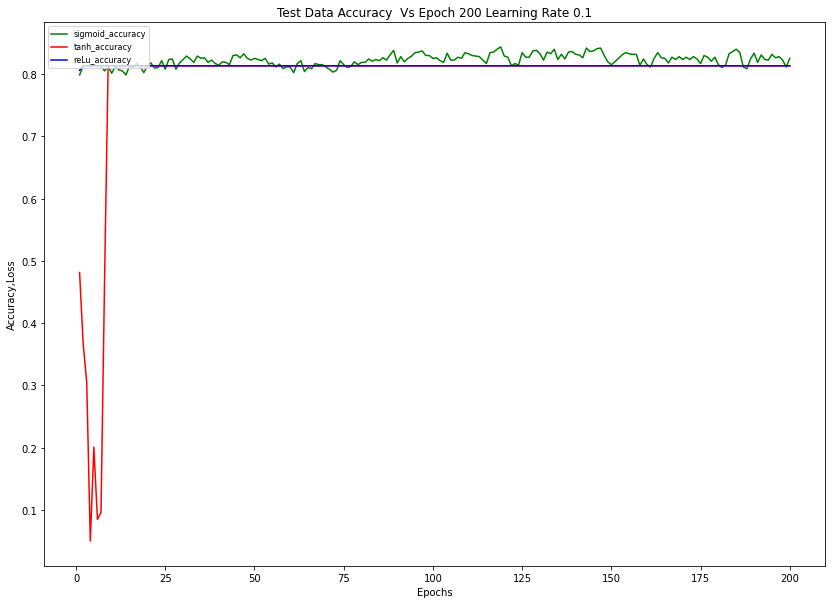

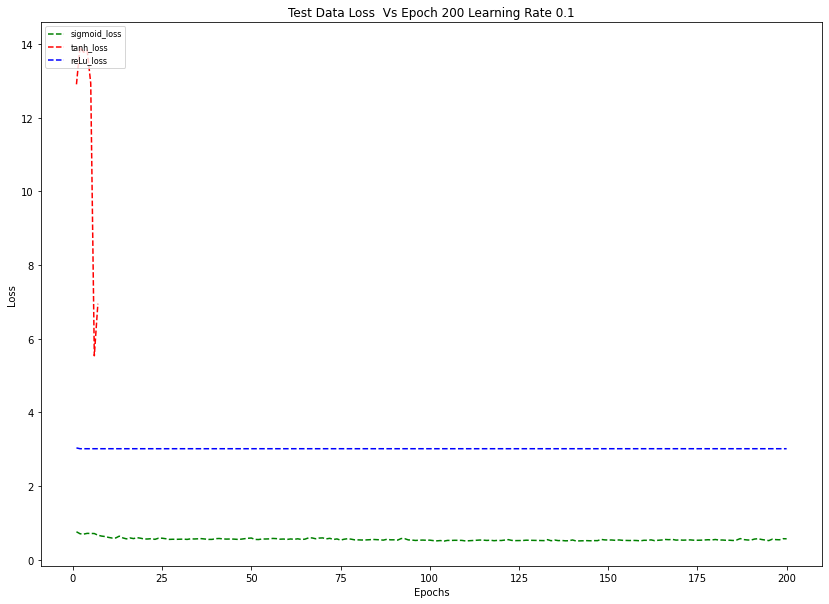



****************************************************************************************************

12




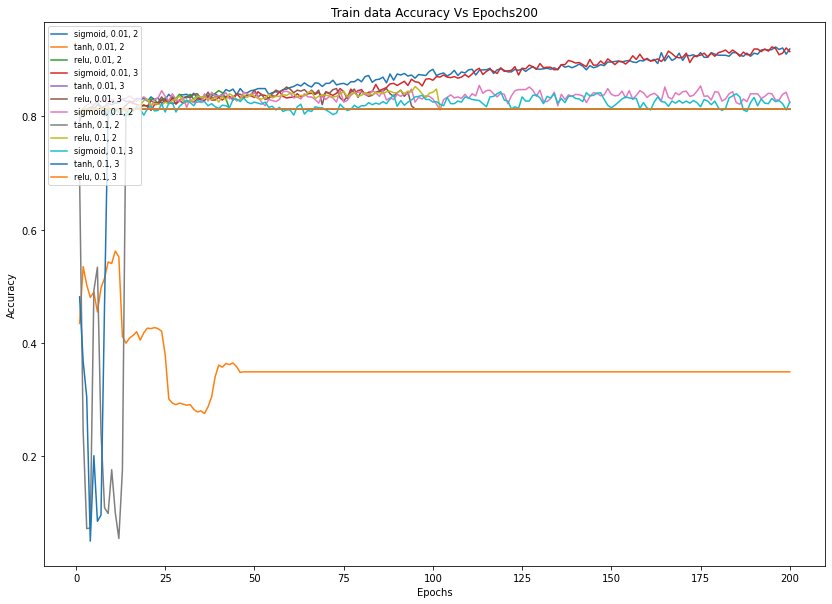

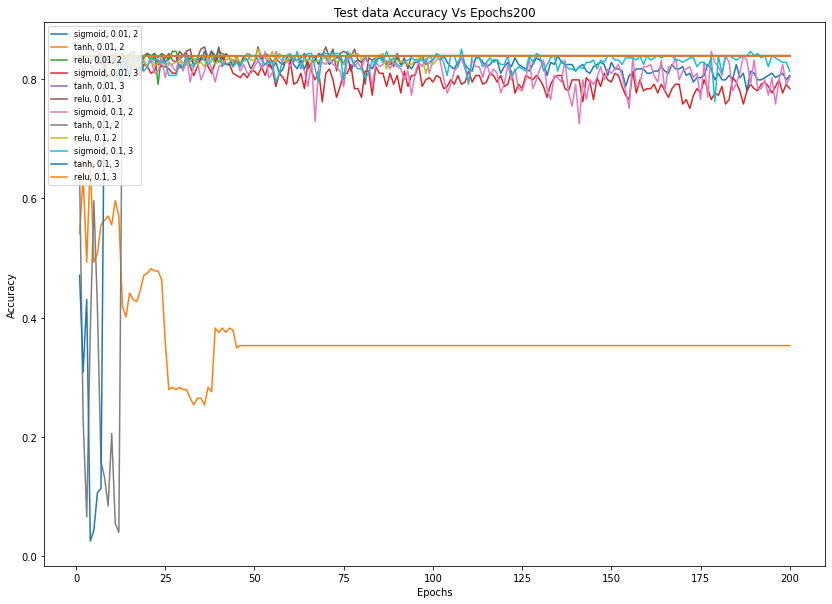

In [ ]:
#train the data and plot the result for each ( epoch,learning rate )
result = neuralNtwkObj.train_evaluate()